In [ ]:
pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
  
import warnings
warnings.filterwarnings('ignore')
# from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import numpy as np
   

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import glob
import os


In [ ]:
path = r'/content/drive/My Drive/tumexceller/'   
all_files = glob.glob(os.path.join(path, "*.xlsx"))    



df_from_each_file = (pd.read_excel(f,'Data') for f in all_files)
df_from_each_file
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)


In [ ]:
# concatenated_df.to_pickle("/content/drive/My Drive/tumexceller/concatenated_Data.pkl")  


In [ ]:
unpickled_df = pd.read_pickle("/content/drive/My Drive/tumexceller/concatenated_Data.pkl")  

In [ ]:
retailData=unpickled_df.copy()

In [ ]:
deleting 0 sales data as It indicates out of stock situation instead of zero sale.

In [ ]:
Exploratory data analysis


In [ ]:
retailData.head()

,GÜN,HAFTA,AY,YIL,TARİH,AMBAR_NO,AMBAR,MALZEME_KODU,MALZEME_ADI,Satış Adedi,segment,İ/Ş,İL,ROUT,SEGMENT
0,5,1,1,2021,2021-01-01,100.0,Beşiktaş (İstanbul),MRK.00826,Milagro Patates File - 2 kg,16,NaN,NaN,NaN,NaN,NaN
1,5,1,1,2021,2021-01-01,100.0,Beşiktaş (İstanbul),MRK.00827,Milagro Salkım Domates - 900 g,8,NaN,NaN,NaN,NaN,NaN
2,5,1,1,2021,2021-01-01,100.0,Beşiktaş (İstanbul),MRK.00830,Milagro Şeker Domates - 250 g,13,NaN,NaN,NaN,NaN,NaN
3,5,1,1,2021,2021-01-01,100.0,Beşiktaş (İstanbul),MRK.00834,Kivi 3'lü Paket - 250 g,5,NaN,NaN,NaN,NaN,NaN
4,5,1,1,2021,2021-01-01,100.0,Beşiktaş (İstanbul),MRK.00926,Milagro Muz - 600 g,5,NaN,NaN,NaN,NaN,NaN


let's delete last 4 unneccassary columns

In [ ]:
retailData.drop(retailData.iloc[:, 10:16], inplace=True, axis=1)


In [ ]:
retailData.head()

,GÜN,HAFTA,AY,YIL,TARİH,AMBAR_NO,AMBAR,MALZEME_KODU,MALZEME_ADI,Satış Adedi
0,5,1,1,2021,2021-01-01,100.0,Beşiktaş (İstanbul),MRK.00826,Milagro Patates File - 2 kg,16
1,5,1,1,2021,2021-01-01,100.0,Beşiktaş (İstanbul),MRK.00827,Milagro Salkım Domates - 900 g,8
2,5,1,1,2021,2021-01-01,100.0,Beşiktaş (İstanbul),MRK.00830,Milagro Şeker Domates - 250 g,13
3,5,1,1,2021,2021-01-01,100.0,Beşiktaş (İstanbul),MRK.00834,Kivi 3'lü Paket - 250 g,5
4,5,1,1,2021,2021-01-01,100.0,Beşiktaş (İstanbul),MRK.00926,Milagro Muz - 600 g,5


In [ ]:
retailData.shape

(11882206, 10)

In [ ]:
retailData.isna().sum().sum() ,

(10502,)

let's see which columns have NA  values and the type of each column

In [ ]:
retailData.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11882206 entries, 0 to 11882205
Data columns (total 10 columns):
 #   Column        Non-Null Count     Dtype         
---  ------        --------------     -----         
 0   GÜN           11882206 non-null  int64         
 1   HAFTA         11882206 non-null  int64         
 2   AY            11882206 non-null  int64         
 3   YIL           11882206 non-null  int64         
 4   TARİH         11882206 non-null  datetime64[ns]
 5   AMBAR_NO      11876955 non-null  float64       
 6   AMBAR         11882206 non-null  object        
 7   MALZEME_KODU  11876955 non-null  object        
 8   MALZEME_ADI   11882206 non-null  object        
 9   Satış Adedi   11882206 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 906.5+ MB


 There are 10502 NA values and according to the above table, half of the NA values come from item code and the other half comes out of store code. The rest of the columns all have non-null values. So I delete those rows with null values. 

In [ ]:
retailData = retailData.dropna()

let's see how many item's have 0 value. 

In [ ]:
(retailData['Satış Adedi'] == 0).sum().sum()

7378135

We dont have the stock data yet I learned that 0 number sales are mostly the out of stock items. that is why their sales value is equal to zero. 

In [ ]:
retailDataNzero = retailData[retailData['Satış Adedi'] != 0].reset_index(drop=True)
retailDataNzero.shape



(4498820, 10)

the number of rows in the data set is downsized to 4.5 million. Let's see some basic statistics son the data 

In [ ]:
(retailDataNzero['Satış Adedi'] == 0).sum().sum()

0

In [ ]:
retailDataNzero.describe(include='all')

,GÜN,HAFTA,AY,YIL,TARİH,AMBAR_NO,AMBAR,MALZEME_KODU,MALZEME_ADI,Satış Adedi
count,4.498820e+06,4.498820e+06,4.498820e+06,4.498820e+06,4498820,4.498820e+06,4498820,4498820,4498820,4.498820e+06
unique,NaN,NaN,NaN,NaN,780,NaN,749,186,315,NaN
top,NaN,NaN,NaN,NaN,2021-11-27 00:00:00,NaN,Beşiktaş (İstanbul),MRK.01002,Milagro Kokteyl Domates - 500 g,NaN
freq,NaN,NaN,NaN,NaN,9217,NaN,30949,157043,82242,NaN
first,NaN,NaN,NaN,NaN,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2023-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,3.038052e+00,2.759997e+01,6.591159e+00,2.021596e+03,NaN,3.319599e+02,NaN,NaN,NaN,3.357248e+00
std,2.034230e+00,1.559274e+01,3.587293e+00,6.098509e-01,NaN,1.593536e+02,NaN,NaN,NaN,3.224641e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,2.021000e+03,NaN,1.000000e+02,NaN,NaN,NaN,-3.000000e+00
25%,1.000000e+00,1.300000e+01,3.000000e+00,2.021000e+03,NaN,2.020000e+02,NaN,NaN,NaN,1.000000e+00


except sales column, all the columns are categorical. Sales column exhibits existence of definite outliars as max value is 92 while std=3.2 and the mean is 3.2.  before outliar detection lets delete the negative values as they are definetely mis-valued.

In [ ]:
retailDataNzero = retailDataNzero[retailDataNzero['Satış Adedi']>0].reset_index(drop=True)


In [ ]:
retailDataNzero.describe(include='all')

,GÜN,HAFTA,AY,YIL,TARİH,AMBAR_NO,AMBAR,MALZEME_KODU,MALZEME_ADI,Satış Adedi
count,4.498683e+06,4.498683e+06,4.498683e+06,4.498683e+06,4498683,4.498683e+06,4498683,4498683,4498683,4.498683e+06
unique,NaN,NaN,NaN,NaN,780,NaN,749,186,315,NaN
top,NaN,NaN,NaN,NaN,2021-11-27 00:00:00,NaN,Beşiktaş (İstanbul),MRK.01002,Milagro Kokteyl Domates - 500 g,NaN
freq,NaN,NaN,NaN,NaN,9217,NaN,30949,157037,82242,NaN
first,NaN,NaN,NaN,NaN,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2023-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,3.038065e+00,2.759987e+01,6.591140e+00,2.021596e+03,NaN,3.319574e+02,NaN,NaN,NaN,3.357385e+00
std,2.034232e+00,1.559269e+01,3.587282e+00,6.098442e-01,NaN,1.593515e+02,NaN,NaN,NaN,3.224593e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,2.021000e+03,NaN,1.000000e+02,NaN,NaN,NaN,1.000000e+00
25%,1.000000e+00,1.300000e+01,3.000000e+00,2.021000e+03,NaN,2.020000e+02,NaN,NaN,NaN,1.000000e+00


<Axes: xlabel='AMBAR', ylabel='Satış Adedi'>

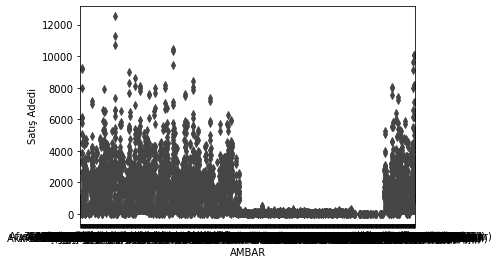

In [ ]:
import seaborn as sns

sns.boxplot(x='AMBAR', y='Satış Adedi', data=grouped_data)


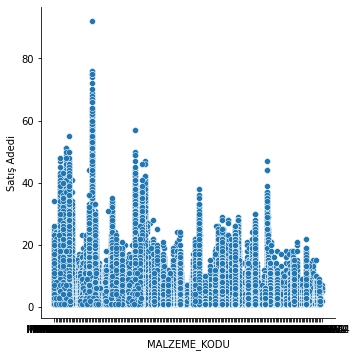

In [ ]:
import seaborn as sns

# Create a pairplot between each item and the corresponding sale value
sns.pairplot(retailDataNzero, x_vars=['MALZEME_KODU'], y_vars=['Satış Adedi'], height=5)

# Display the plot
plt.show()


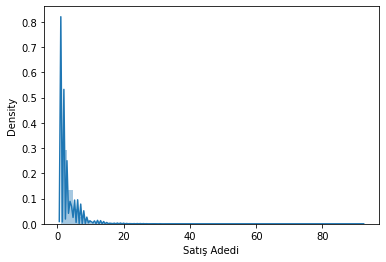

In [ ]:
sns.distplot(retailDataNzero['Satış Adedi'], kde= True)
plt.show()


let's see outliars with a scatter plot

array([[<Axes: title={'center': 'GÜN'}>,
        <Axes: title={'center': 'HAFTA'}>,
        <Axes: title={'center': 'AY'}>],
       [<Axes: title={'center': 'YIL'}>,
        <Axes: title={'center': 'TARİH'}>,
        <Axes: title={'center': 'AMBAR_NO'}>],
       [<Axes: title={'center': 'Satış Adedi'}>, <Axes: >, <Axes: >]],
      dtype=object)

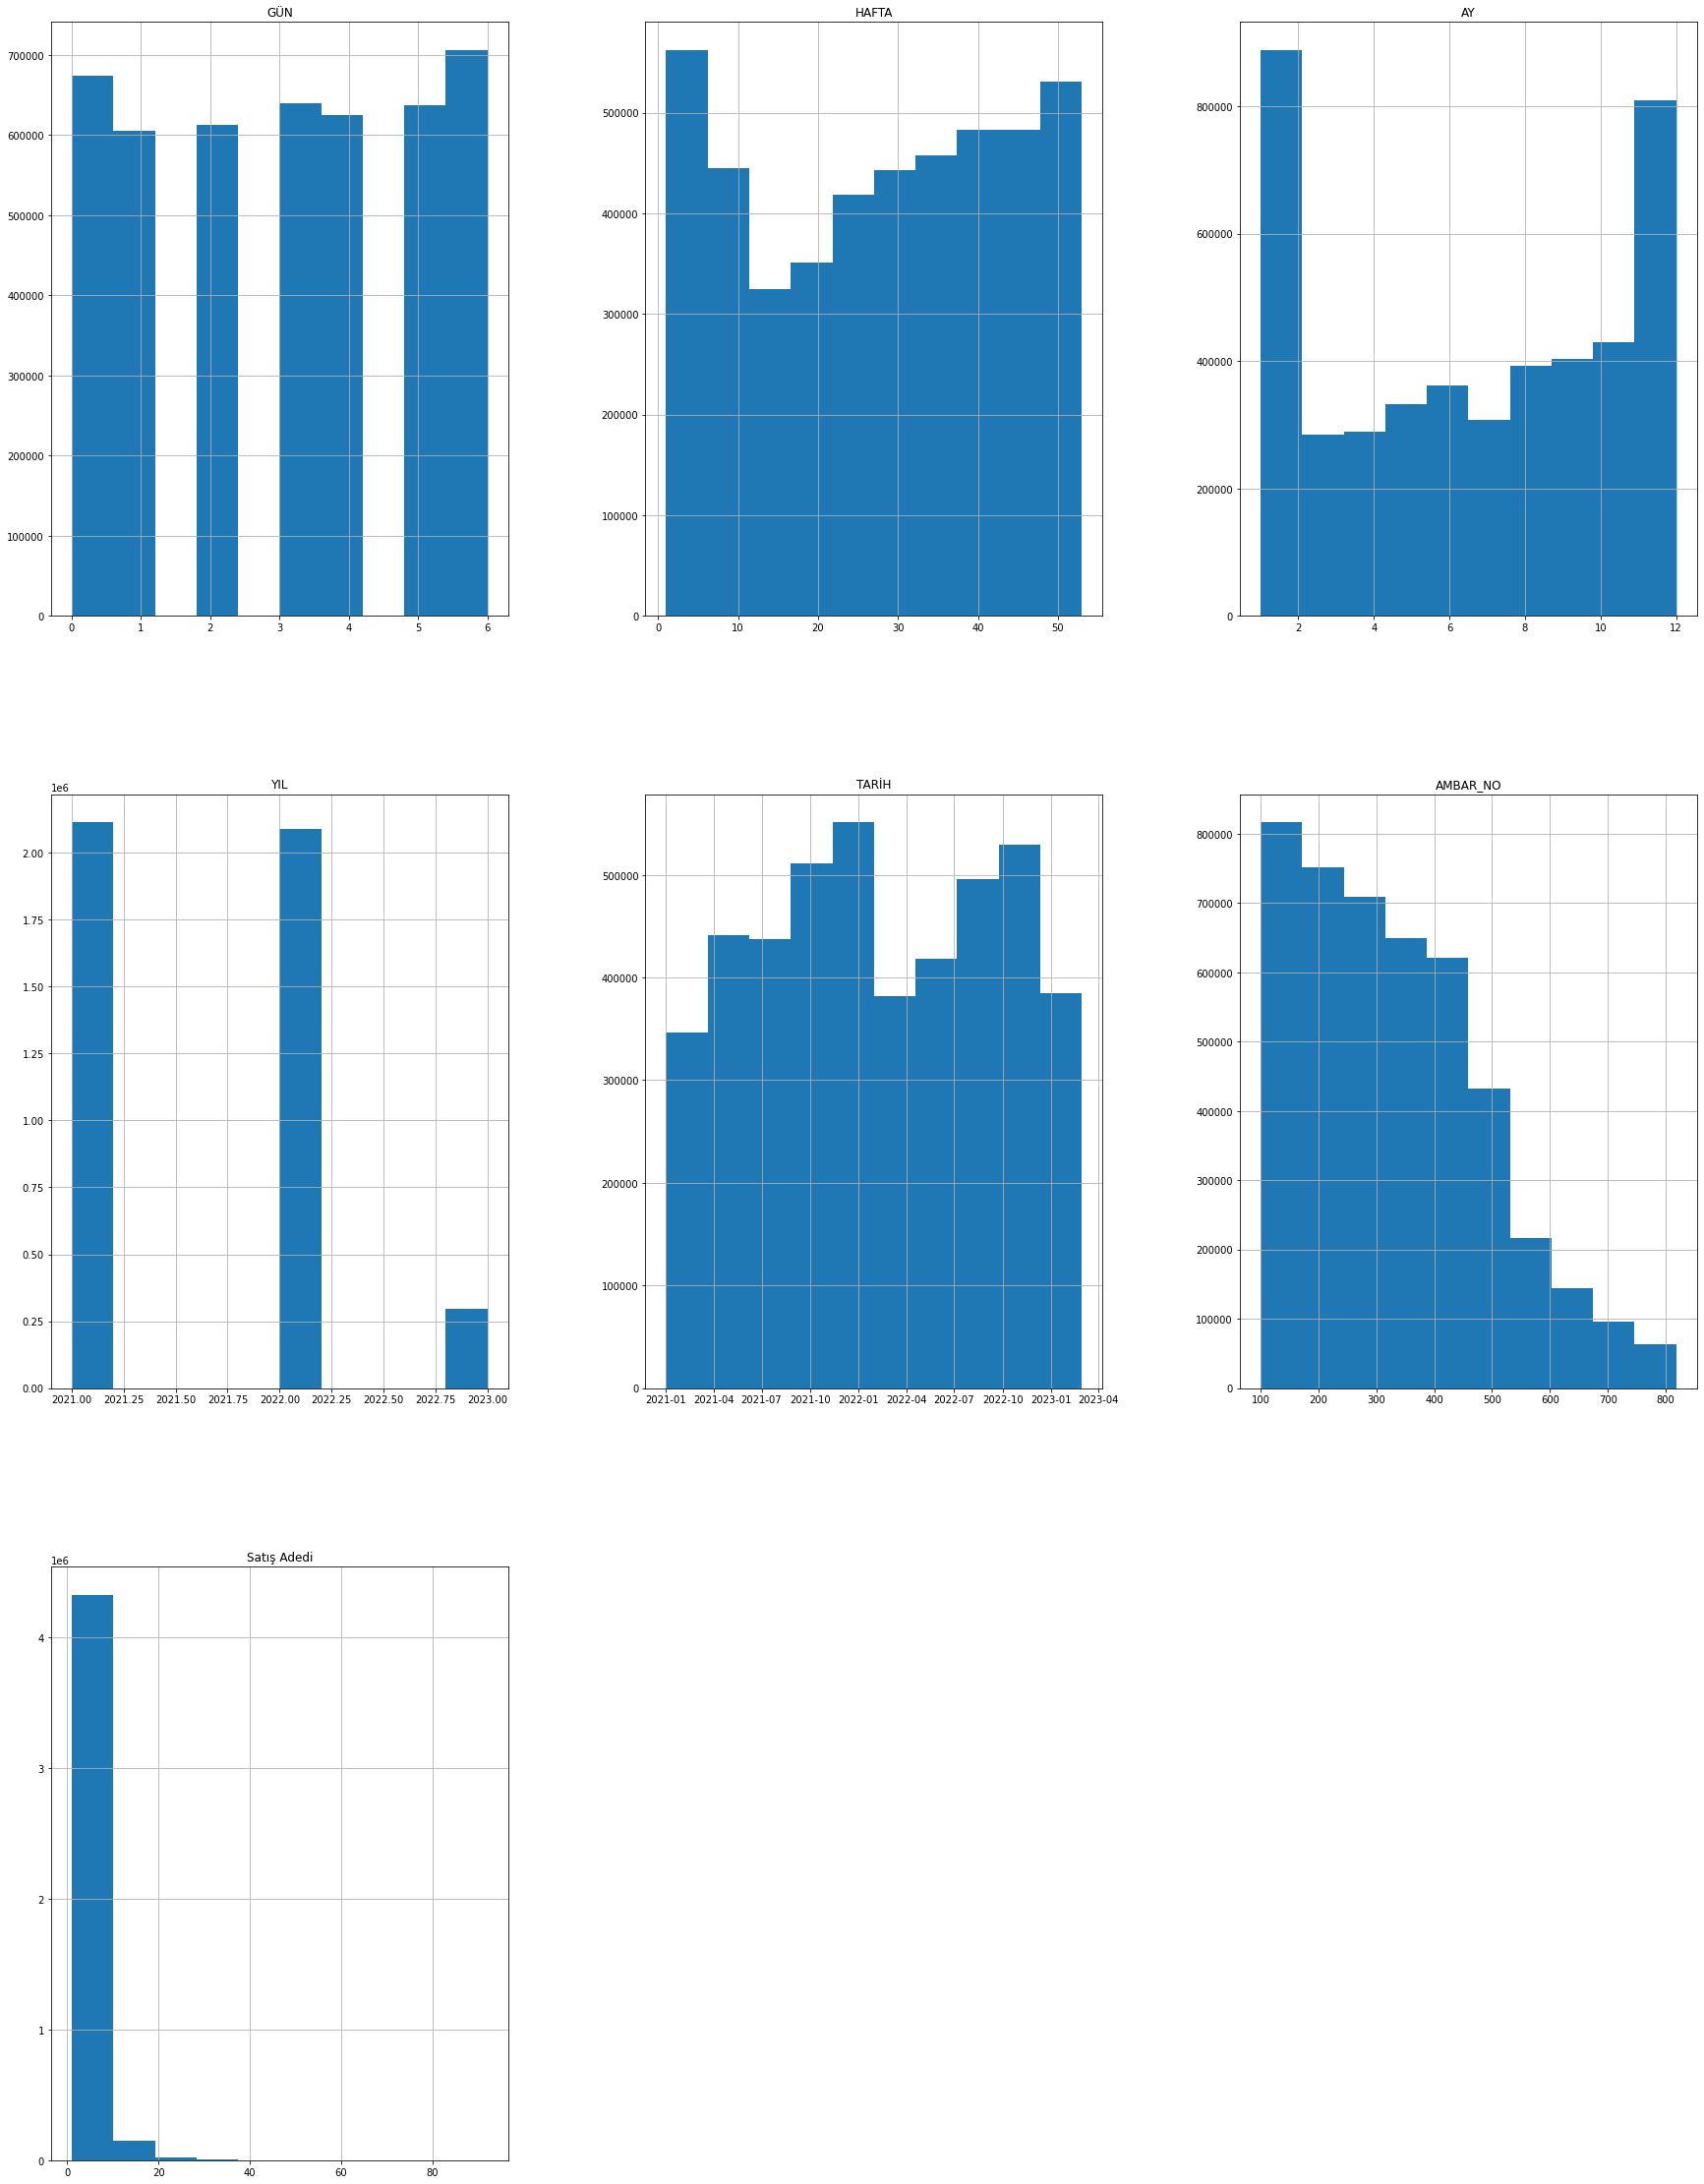

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
retailDataNzero.hist(figsize=(30,40))

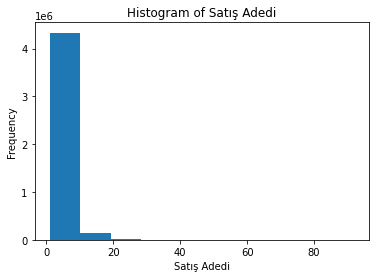

In [ ]:
plt.hist(retailDataNzero['Satış Adedi'])

# Set axis labels and plot title
plt.xlabel('Satış Adedi')
plt.ylabel('Frequency')
plt.title('Histogram of Satış Adedi')

# Show the plot
plt.show()


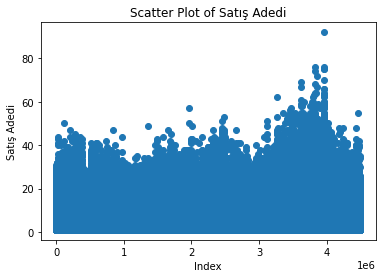

In [ ]:
import matplotlib.pyplot as plt

# create a scatter plot of the 'Satış Adedi' column
plt.scatter(range(len(retailDataNzero['Satış Adedi'])), retailDataNzero['Satış Adedi'])
plt.xlabel('Index')
plt.ylabel('Satış Adedi')
plt.title('Scatter Plot of Satış Adedi')
plt.show()


***plotting the total sales data for every month. ***

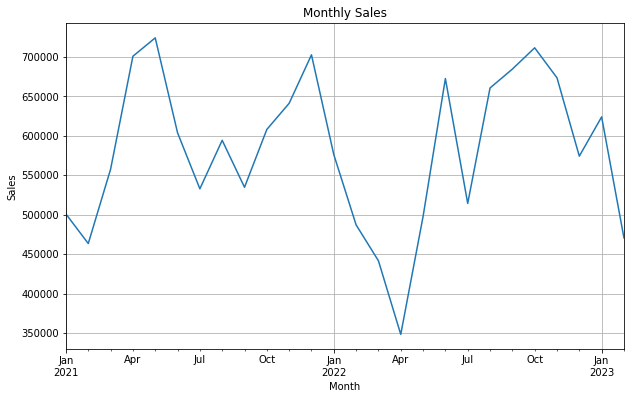

In [ ]:
monthly_sales = retailDataNzero.groupby(pd.Grouper(key='TARİH', freq='M'))['Satış Adedi'].sum()

# Create a line chart of the monthly sales
fig, ax = plt.subplots(figsize=(10, 6))
monthly_sales.plot(kind='line', ax=ax)

# Customize the plot
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid()
plt.show()


In [ ]:
Data21=retailDataNzero[(retailDataNzero['TARİH'] >= '2021-01-01') & (retailDataNzero['TARİH'] < '2022-01-01')].reset_index(drop=True)

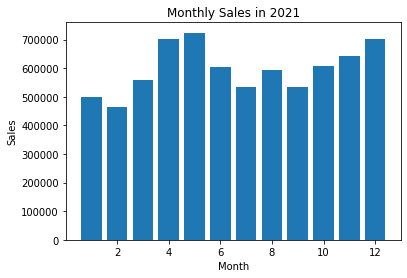

In [ ]:
# Assuming your data frame is named 'data22'
monthly_sales1 = Data21.groupby(['AY'])['Satış Adedi'].sum()
# print(monthly_sales)

# Plotting the bar chart
plt.bar(monthly_sales.index, monthly_sales.values)
plt.title('Monthly Sales in 2021')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


In [ ]:
Data2223= retailDataNzero[retailDataNzero['TARİH'] >= '2022-01-01'].reset_index(drop=True)


In [ ]:
Data22=Data2223[retailDataNzero['TARİH']<'2023-01-01']

In [ ]:
Data2223['TARİH'] = pd.to_datetime(Data2223['TARİH'], utc=True)

monthly sales for 2022

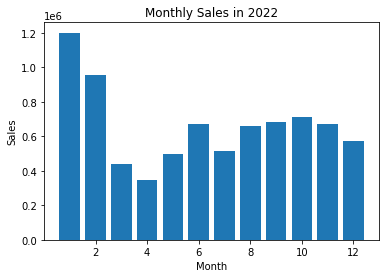

In [ ]:
import matplotlib.pyplot as plt

# Assuming your data frame is named 'data22'
monthly_sales2 = Data22.groupby(['AY'])['Satış Adedi'].sum()
# print(monthly_sales)

# Plotting the bar chart
plt.bar(monthly_sales2.index, monthly_sales2.values)
plt.title('Monthly Sales in 2022')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


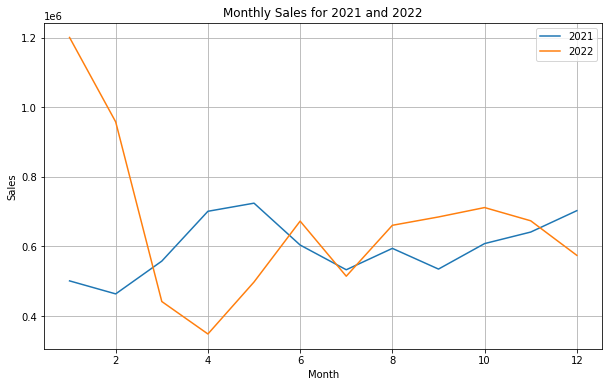

In [ ]:
monthly_sales = pd.concat([monthly_sales1, monthly_sales2], axis=1)
monthly_sales.columns = ['2021', '2022']

# Plot the monthly sales as a line graph
monthly_sales.plot(kind='line', figsize=(10, 6))

# Customize the plot
plt.title('Monthly Sales for 2021 and 2022')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid()
plt.show()


In [ ]:
      
def weekend_or_weekday(day):
    if day>4:
        return 1
    else:
        return 0
  
Data2223['weekend'] = Data2223.apply(lambda x:weekend_or_weekday(x['GÜN']), axis=1)
Data2223.tail()


In [ ]:
Data2223.dtypes

In [ ]:
from datetime import date
import holidays

# turkey_holidays = holidays.country_holidays('TR')
# turkey_holidays.get('2023-05-01')
# turkey_holidays = holidays.country_holidays('TR')

def is_holiday(x):
    
  turkey_holidays = holidays.country_holidays('TR')
  
  if turkey_holidays.get(x):
      return 1
  else:
      return 0
      
Data2223['holidays'] = Data2223['TARİH'].apply(is_holiday)


In [ ]:
retailData['day'] = pd.to_datetime(retailData['TARİH'], utc=True).dt.day

In [ ]:
Data2223.to_pickle("/content/drive/My Drive/tumexceller/dataAfter2022.pkl")  


In [ ]:
Data2223=pd.read_pickle("/content/drive/My Drive/tumexceller/dataAfter2022.pkl")

autocorrelatıon for 2023

In [ ]:
Data2 =Data2223.copy()
Data2=Data2[Data2['TARİH'] >= '2023-01-01'].reset_index(drop=True)


In [ ]:
Data2.shape

(294850, 12)

In [ ]:
Data2['TARİH']

0        2023-01-01
1        2023-01-01
2        2023-01-01
3        2023-01-01
4        2023-01-01
            ...    
294845   2023-02-28
294846   2023-02-28
294847   2023-02-28
294848   2023-02-28
294849   2023-02-28
Name: TARİH, Length: 294850, dtype: datetime64[ns]

In [ ]:
Data2['Satış Adedi'].dtypes

dtype('int64')

The Autocorrelation plot for the data is:


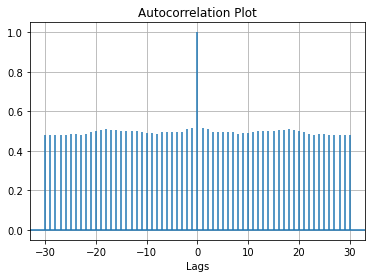

In [ ]:

data = Data2['Satış Adedi'].astype(float)

# Data for which we plot Autocorrelation.
# data = Data2['Satış Adedi']
   
# Adding plot title.
plt.title("Autocorrelation Plot")
 
# Providing x-axis name.
plt.xlabel("Lags")
 
# Plotting the Autocorrelation plot.
plt.acorr(data, maxlags = 30)
 
# Displaying the plot.
print("The Autocorrelation plot for the data is:")
plt.grid(True)
 
plt.show()



In [ ]:
Data2223['AMBAR']=Data2223['AMBAR'].astype("string") 
Data2223['MALZEME_KODU']= Data2223['MALZEME_KODU'].astype("string") 
Data2223['MALZEME_ADI']= Data2223['MALZEME_ADI'].astype("string") 
Data2223['AMBAR_NO'] = Data2223['AMBAR_NO'].astype(np.int64)



In [ ]:
Data2223 = Data2223.sort_values(by='TARİH') # Step 1
Data2223['last_7_days_avg'] = Data2223.groupby(['AMBAR', 'MALZEME_KODU'])['Satış Adedi'].rolling(window=8).mean().values # Steps 2-4
Data2223['last_7_days_avg']=Data2223.groupby(['AMBAR', 'MALZEME_KODU'])['last_7_days_avg'].shift(1)
# Data2223.loc[Data2223.groupby(['AMBAR', 'MALZEME_KODU'])['last_7_days_avg'].head(7).index, 'last_7_days_avg'] = pd.UInt64Index

In [ ]:
Data2223['last_7_days_avg']=Data2223['last_7_days_avg'].astype(np.int64)

TypeError: ignored

In [ ]:
Data2223.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385152 entries, 0 to 2385151
Data columns (total 11 columns):
 #   Column           Dtype              
---  ------           -----              
 0   GÜN              int64              
 1   AY               int64              
 2   YIL              int64              
 3   TARİH            datetime64[ns, UTC]
 4   AMBAR_NO         float64            
 5   AMBAR            object             
 6   MALZEME_KODU     object             
 7   MALZEME_ADI      object             
 8   Satış Adedi      int64              
 9   day              int64              
 10  last_7_days_avg  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(5), object(3)
memory usage: 218.4+ MB


In [ ]:
features = Data2223.drop(['Satış Adedi', 'YIL', 'TARİH', 'AMBAR_NO', 'MALZEME_ADI', 'GÜN'], axis=1)
target = Data2223['Satış Adedi'].values
  
  
X_train, X_val, Y_train, Y_val = train_test_split(features, target,
                                                  test_size = 0.1,
                                                  random_state=22)
X_train.shape, X_val.shape

((2146636, 5), (238516, 5))

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385152 entries, 0 to 2385151
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   AY               int64  
 1   AMBAR            object 
 2   MALZEME_KODU     object 
 3   day              int64  
 4   last_7_days_avg  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 109.2+ MB


In [ ]:
features.head()

In [ ]:
categorical_features_indices = np.where(X_train.dtypes != np.int)[0]
categorical_features_indices 

In [ ]:
X_train.shape, Y_train.shape


model=CatBoostRegressor(loss_function='RMSE', cat_features=[1,2])
grid = {'learning_rate': [0.03,0.05, 0.1],
        'depth': [ 6, 8, 10,],
        'l2_leaf_reg': [1, 3, 5, 7, 9],
        'iterations':[300,400,500]}
        
grid_search_result = model.grid_search(grid, 
                                       X=X_train, 
                                       y=Y_train, 
                                       cat_features=[1,2],
                                       plot=True)

In [ ]:
CBC=CatBoostRegressor(loss_function='RMSE', cat_features=[0,1,2,3])
grid = {'learning_rate': [0.03,0.05, 0.1],
        'depth': [ 4,5],
        'l2_leaf_reg': [ 3, 5, 7, 9],
        'iterations':[300,400,500]}
        
Grid_CBC = GridSearchCV(estimator=CBC, param_grid = grid, cv = 3, n_jobs=-1)
Grid_CBC.fit(X_train, Y_train)


In [ ]:
categorical_features_indices = np.where(X_train.dtypes != np.float)[0]
model=CatBoostRegressor(500, depth=15, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, Y_train,cat_features=[0,1,2,3],eval_set=(X_val, Y_val),plot=True)

# print(f'{model} : ')
  
# train_preds = model.predict(X_train)
# print('Training Error : ', mae(Y_train, train_preds))
  
# val_preds = models[i].predict(X_val)
# print('Validation Error : ', mae(Y_val, val_preds))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 3.0849481	test: 3.0561517	best: 3.0561517 (0)	total: 2.96s	remaining: 24m 34s
1:	learn: 2.9486033	test: 2.9207719	best: 2.9207719 (1)	total: 5.49s	remaining: 22m 46s
2:	learn: 2.8322524	test: 2.8046675	best: 2.8046675 (2)	total: 7.23s	remaining: 19m 58s
3:	learn: 2.7331558	test: 2.7070323	best: 2.7070323 (3)	total: 9.35s	remaining: 19m 19s
4:	learn: 2.6480698	test: 2.6213338	best: 2.6213338 (4)	total: 11.1s	remaining: 18m 15s
5:	learn: 2.5755211	test: 2.5486228	best: 2.5486228 (5)	total: 12.8s	remaining: 17m 33s
6:	learn: 2.5144413	test: 2.4878003	best: 2.4878003 (6)	total: 14.7s	remaining: 17m 13s
7:	learn: 2.4634587	test: 2.4365211	best: 2.4365211 (7)	total: 16.6s	remaining: 17m 2s
8:	learn: 2.4098380	test: 2.3813419	best: 2.3813419 (8)	total: 19.8s	remaining: 17m 58s
9:	learn: 2.3636831	test: 2.3340540	best: 2.3340540 (9)	total: 21.8s	remaining: 17m 46s
10:	learn: 2.3257600	test: 2.2961642	best: 2.2961642 (10)	total: 24.2s	remaining: 17m 55s
11:	learn: 2.2929836	test: 2.26

In [ ]:
2.04/Y_train.mean()